In [32]:
#imports i think i might need
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import mason_functions as mf
import warnings
warnings.filterwarnings('ignore')

# Evaluate Exercises

## Exercise I
Load the tips dataset from either pydataset or seaborn.

In [33]:
#load
tips = sns.load_dataset('tips')

In [34]:
#fire
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
#yuh
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Exercise II
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

In [36]:
#from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
#model = LinearRegression().fit(X, y)
#predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [37]:
#is this my baseline?
tips.tip.mean()

2.9982786885245902

In [38]:
#this my baseline?
tips.tip.median()

2.9

In [39]:
#this my baseline
baseline = tips.tip.mean()
tips['baseline'] = tips.tip.mean()

In [40]:
#x and y
X = tips[['total_bill']]
y = tips['tip']

#create object
lm = LinearRegression(normalize = True)

#fit object
lm.fit(X, y)

#predict
tips['y_hat'] = lm.predict(X)

In [41]:
tips

,total_bill,tip,sex,smoker,day,time,size,baseline,y_hat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


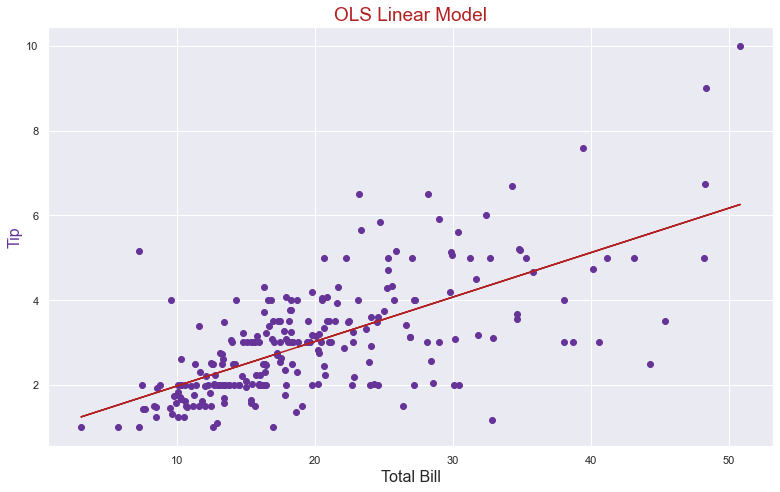

In [42]:
#figure
plt.figure(figsize = (11, 7))

#scatterplot of original x and y
plt.scatter(tips.total_bill, tips.tip, color = 'rebeccapurple')

#lineplot of predicted values
plt.plot(tips.total_bill, tips.y_hat, color = 'firebrick')

#clarity
plt.xlabel('Total Bill', size = 16)
plt.ylabel('Tip', color = 'rebeccapurple', size = 16)
plt.title('OLS Linear Model', color = 'firebrick', size = 19)
plt.tight_layout();

In [43]:
#calculate residuals
tips['residual'] = tips.tip - tips.y_hat
tips['baseline_residual'] = tips.tip - tips.baseline

In [44]:
#verify sum of residuals is zero
tips.residual.sum()

7.460698725481052e-14

In [45]:
#verify
tips.baseline_residual.sum()

-2.4868995751603507e-14

## Exercise III
Plot the residuals for the linear regression model that you made.

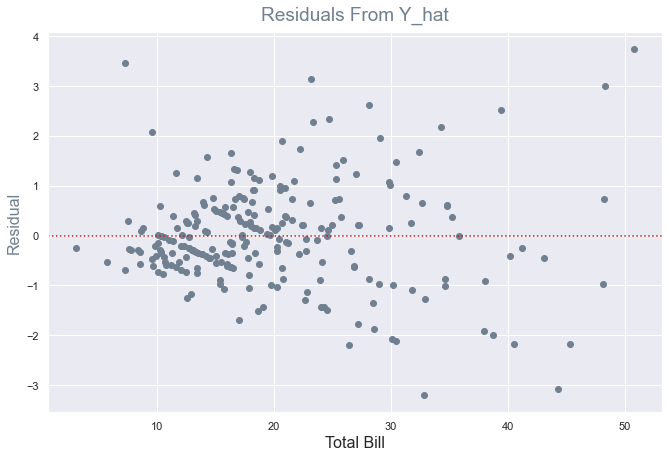

In [46]:
#create figure
plt.figure(figsize = (11, 7))

#scatter!
plt.scatter(tips.total_bill, tips.residual, color = 'slategray')

#plot a dotted horizontal line at 0 to help visualize residual values
plt.axhline(y = 0, ls = ':', color = 'firebrick')

#clarity
plt.title('Residuals From Y_hat', pad = 11, size = 19, color = 'slategray')
plt.xlabel('Total Bill', size = 16)
plt.ylabel('Residual', size = 16, color = 'slategray');

## Exercise IV
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [47]:
#calculate SSE, ESS, TSS, MSE, RMSE

#generate squares of errors
tips['residual^2'] = tips.residual ** 2
tips['baseline_residual^2'] = tips.baseline_residual ** 2

#sum of squared errors
SSE = tips['residual^2'].sum()
SSE_baseline = tips['baseline_residual^2'].sum()
if __name__ == '__main__':
    print(f'Sum of Squared Errors = {round(SSE, 2)}')
    print(f'SSE_baseline = {round(SSE_baseline, 2)}')

Sum of Squared Errors = 252.79
SSE_baseline = 465.21


In [48]:
#ESS = explained sum of squares (sum of the squares of the differences between predicted values and the mean of all actual values)
ESS = sum((tips.y_hat - tips.tip.mean())**2)
if __name__ == '__main__':
    print(f'Explained Sum of Squares = {ESS}')

Explained Sum of Squares = 212.42373319840445


In [49]:
#TSS = total sum of squares (can be derived from the sum of ESS and SSE) (in this case, it is also my baseline SSE)
TSS = ESS + SSE
if __name__ == '__main__':
    print(f'Total Sum of Squares = {round((TSS), 2)}')

Total Sum of Squares = 465.21


In [50]:
#MSE = mean squared error
MSE = SSE / len(tips)
if __name__ == '__main__':
    print(f'Mean of Squared Errors = {round(MSE, 2)}')

Mean of Squared Errors = 1.04


In [51]:
#RMSE = root mean squared error
RMSE = MSE ** (1/2)
if __name__ == '__main__':
    print(f'Root of Mean of Squared Errors = {round(RMSE, 2)}')

Root of Mean of Squared Errors = 1.02


## Exercise V
Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [52]:
#calculate SSE_baseline, MSE_baseline, RMSE_baseline
MSE_baseline = SSE_baseline / len(tips)
RMSE_baseline = MSE_baseline ** (1/2)
print(f'Sum of squared errors for baseline model: {round(SSE_baseline, 2)}')
print(f'Mean of squared errors for baseline model: {round(MSE_baseline, 2)}')
print(f'Root of mean of squared errors for baseline model: {round(RMSE_baseline, 2)}')

Sum of squared errors for baseline model: 465.21
Mean of squared errors for baseline model: 1.91
Root of mean of squared errors for baseline model: 1.38


## Exercise VI
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [53]:
#simple function that defines two parameters, sum of squared errors for my model and the baseline's, and returns a string that conveys which model is better.
def compare_2_baseline(SSE, SSE_baseline):
    if SSE < SSE_baseline:
        print(f'My OLS model performs better than the baseline model.')
    else:
        print(f'The baseline model is better.')

In [54]:
compare_2_baseline(SSE, SSE_baseline)

My OLS model performs better than the baseline model.


## Exercise VII
What is the amount of variance explained in your model?

In [55]:
#R^2 = explained variance
R2 = ESS / TSS
print(f'The amount of variance explained in my model is {round(R2, 2)}.')

The amount of variance explained in my model is 0.46.


## Exercise VIII
Is your model better than the baseline model?

In [56]:
#index for my df
metric = ['SSE', 'MSE', 'RMSE']

#df for easy metric comparison
model_juxt = pd.DataFrame({'model_error': [SSE, MSE, RMSE],
                         'baseline_error': [SSE_baseline, MSE_baseline, RMSE_baseline]
                         }, index = metric)

In [57]:
#boolean mask to determine if model errors are better than baseline errors (less error is better error)
model_juxt['beats_baseline'] = model_juxt['model_error'] < model_juxt['baseline_error']

In [58]:
#a look at the dataframe
model_juxt

,model_error,baseline_error,beats_baseline
SSE,252.788744,465.212477,True
MSE,1.036019,1.906609,True
RMSE,1.017850,1.380800,True


## Exercise IX

Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
* sum of squared errors (SSE)
* explained sum of squares (ESS)
* total sum of squares (TSS)
* mean squared error (MSE)
* root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [76]:
def plot_residuals(y, y_hat):
    #calculate residuals
    residuals = y - y_hat
    
    #create figure
    plt.figure(figsize = (8, 5))
    
    #plot residuals
    plt.scatter(y, residuals, color = 'slategray')
    
    #plot a dotted horizontal line at 0 to help visualize residual values
    plt.axhline(y = 0, ls = ':', color = 'firebrick')
    
    #clarity
    plt.title('Residuals From Predicted Values', pad = 7, size = 17, color = 'slategray')
    plt.xlabel('Actual Value', size = 15)
    plt.ylabel('Residual', size = 15, color = 'slategray');

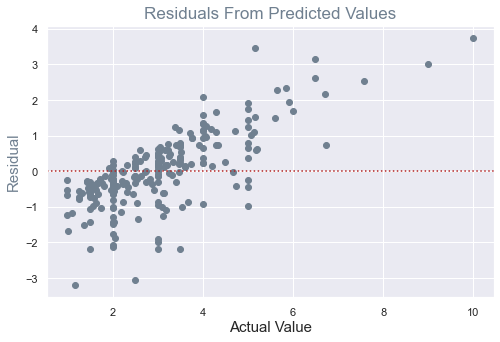

In [77]:
#testing, testing
plot_residuals(tips.tip, tips.y_hat)

In [61]:
def regression_errors(y, y_hat):
    #calculate residuals
    residuals = y - y_hat
    
    #residuals squared
    residuals_squared = residuals ** 2
    
    #sum of squared errors
    SSE = residuals_squared.sum()
    
    #explained sum of squares
    ESS = sum((y_hat - y.mean())**2)
    
    #total sum of squares
    TSS = ESS + SSE
    
    #mean of squared errors
    MSE = SSE / len(y)
    
    #root of mean of squared errors
    RMSE = MSE ** (1/2)
    
    #assign values to series
    model_metrics = pd.Series({
        'SSE': SSE,
        'ESS': ESS,
        'TSS': TSS,
        'MSE': MSE,
        'RMSE': RMSE
    })
    
    #gimme gimme
    print('Model Metrics')
    print('=============')
    return model_metrics

In [31]:
regression_errors(tips.tip, tips.y_hat)

Model Metrics


SSE     252.788744
ESS     212.423733
TSS     465.212477
MSE       1.036019
RMSE      1.017850
dtype: float64

In [50]:
def compare_train_validate_errors(y, trainy_hat, validatey_hat):
    #calculate residuals
    residuals = y - ty_hat
    
    #residuals squared
    residuals_squared = residuals ** 2
    
    #sum of squared errors
    train_SSE = residuals_squared.sum()
    
    #mean of squared errors
    train_MSE = train_SSE / len(y)
    
    #root of mean of squared errors
    train_RMSE = train_MSE ** (1/2)
    
    ### calculate residuals for validate
    residuals = y - vy_hat
    
    #residuals squared
    residuals_squared = residuals ** 2
    
    #sum of squared errors
    validate_SSE = residuals_squared.sum()
    
    #mean of squared errors
    validate_MSE = validate_SSE / len(y)
    
    #root of mean of squared errors
    validate_RMSE = validate_MSE ** (1/2)
    
    print(f'Train RMSE: {train_RMSE}')
    print(f'Validate RMSE: {validate_RMSE}')
    print(f'Difference: {validate_RMSE - train_RMSE}')

SyntaxError: unexpected EOF while parsing (<ipython-input-50-c9018a4328c1>, line 1)

In [32]:
def baseline_mean_errors(y):
    #determine baseline
    baseline = y.mean()
    
    #calculate baseline residuals
    baseline_residuals = y - y.mean()
    
    #sum of squared errors (baseline)
    SSE = (baseline_residuals ** 2).sum()
    
    #mean of squared errors (baseline)
    MSE = SSE / len(y)
    
    #root of mean of squared errors (baseline)
    RMSE = MSE ** (1/2)
    
    print('Baseline Metrics')
    print('----------------')
    return pd.Series({
        'SSE': SSE,
        'MSE': MSE, 
        'RMSE': RMSE
    })

In [33]:
baseline_mean_errors(tips.tip)

Baseline Metrics
----------------


SSE     465.212477
MSE       1.906609
RMSE      1.380800
dtype: float64

In [34]:
def better_than_baseline(y, y_hat):
    #calculate residuals
    residuals = y - y_hat
    
    #residuals squared
    residuals_squared = residuals ** 2
    
    #sum of squared errors
    SSE = residuals_squared.sum()
    
    #mean of squared errors
    MSE = SSE / len(y)
    
    #root of mean of squared errors
    RMSE = MSE ** (1/2)
    
    #determine baseline
    baseline = y.mean()
    
    #calculate baseline residuals
    baseline_residuals = y - y.mean()
    
    #sum of squared errors (baseline)
    SSE_baseline = (baseline_residuals ** 2).sum()
    
    #mean of squared errors (baseline)
    MSE_baseline = SSE_baseline / len(y)
    
    #root of mean of squared errors (baseline)
    RMSE_baseline = MSE_baseline ** (1/2)
    
    #return bool True if mine model is better; return bool False if no
    return RMSE < RMSE_baseline

In [35]:
better_than_baseline(tips.tip, tips.y_hat)

True

## Exercise X
Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [36]:
#load
mpg = sns.load_dataset('mpg')

In [37]:
#wait, where is hwy mpg?
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [38]:
#load
from pydataset import data
mpg = data('mpg')

In [39]:
#found it
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [40]:
#get a baseline
baseline = mpg.hwy.mean()
mpg['baseline'] = mpg.hwy.mean()

In [41]:
#x and y
X = mpg[['displ']]
y = mpg['hwy']

#create object
lm = LinearRegression(normalize = True)

#fit object
lm.fit(X, y)

#predict
mpg['y_hat'] = lm.predict(X)

In [42]:
import evaluate

In [43]:
evaluate.regression_errors(mpg.hwy, mpg.y_hat)

Model Metrics


SSE     3413.829009
ESS     4847.833384
TSS     8261.662393
MSE       14.589013
RMSE       3.819557
dtype: float64

In [44]:
evaluate.baseline_mean_errors(mpg.hwy)

Baseline Metrics
----------------


SSE     8261.662393
MSE       35.306250
RMSE       5.941906
dtype: float64

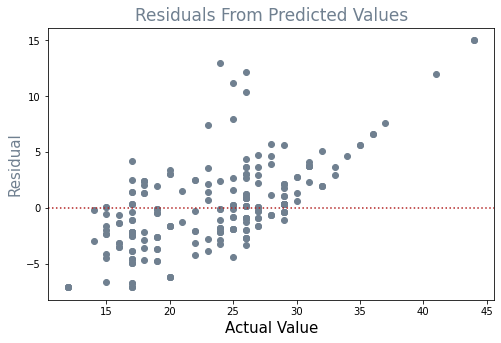

In [45]:
evaluate.plot_residuals(mpg.hwy, mpg.y_hat)

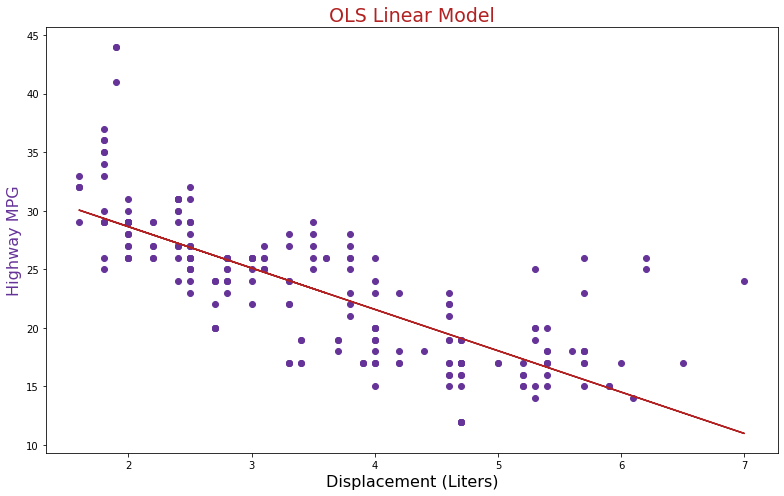

In [46]:
#figure
plt.figure(figsize = (11, 7))

#scatterplot of original x and y
plt.scatter(mpg.displ, mpg.hwy, color = 'rebeccapurple')

#lineplot of predicted values
plt.plot(mpg.displ, mpg.y_hat, color = 'firebrick')

#clarity
plt.xlabel('Displacement (Liters)', size = 16)
plt.ylabel('Highway MPG', color = 'rebeccapurple', size = 16)
plt.title('OLS Linear Model', color = 'firebrick', size = 19)
plt.tight_layout();

In [47]:
#define residuals for plot
mpg['residual'] = mpg.hwy - mpg.y_hat

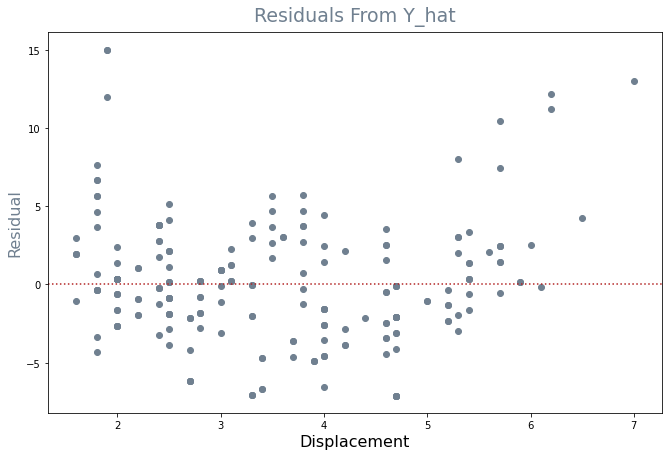

In [48]:
#create figure
plt.figure(figsize = (11, 7))

#scatter!
plt.scatter(mpg.displ, mpg.residual, color = 'slategray')

#plot a dotted horizontal line at 0 to help visualize residual values
plt.axhline(y = 0, ls = ':', color = 'firebrick')

#clarity
plt.title('Residuals From Y_hat', pad = 11, size = 19, color = 'slategray')
plt.xlabel('Displacement', size = 16)
plt.ylabel('Residual', size = 16, color = 'slategray');